In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Normalize
# Outlier detection
# Binary sistemde tahminleme yapılabilir

In [739]:
df_train = pd.read_parquet("train_final.parquet")
df_test = pd.read_parquet("test_final.parquet")
df_sample_submission = pd.read_parquet("submission_sample_final.parquet")

In [740]:
df_train

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,2e54f32ced9fae6ef802ceaa2,12,44.397,43.425,41.678,O2 - DE,HUAWEI,-1.531534,2.596604,0.340233,...,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68,"menu2, menu8, menu4"
94045,6aa4ff0f6cc5ef4c2980b2862,12,44.331,43.977,40.620,TURKCELL,samsung,-1.268987,2.300487,0.231711,...,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43,"menu9, menu2, menu5"
94046,fa842185a0edd210845b78308,12,44.142,43.591,41.736,VODAFONE TR,Apple,-1.950039,2.805681,0.438200,...,0.184886,-3.477337,0.449427,0.445361,-0.495204,-0.955097,-3.843092,4,25,"menu6, menu2, menu4"
94047,db8f55b8499f8d8c05148240e,12,43.963,43.350,40.862,TURK TELEKOM,Redmi,-2.389140,2.358281,0.683524,...,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60,"menu6, menu8, menu4"


In [741]:
df_test

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,VODAFONE TR,samsung,-1.723524,3.216489,-1.138474,...,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,TURKCELL,Apple,-0.417275,2.024433,0.102952,...,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,TURKCELL,samsung,-2.943294,2.769536,0.734942,...,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,TURK TELEKOM,Apple,-2.346902,2.684752,0.168206,...,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,TURKCELL,POCO,-1.745354,2.355863,0.318961,...,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,7687113f46112edf4f56666ee,1,47.726,40.879,40.647,TURKCELL,HUAWEI,-2.952961,1.352361,-0.396846,...,0.333993,-0.533786,-1.779781,0.228962,0.403641,-0.906588,-0.788647,-0.627803,18,45
11951,5ff8eb7a06fd48b60dbc04f34,1,47.471,44.745,41.040,TURKCELL,Apple,-1.945921,2.003634,-0.300293,...,1.468012,-1.345186,-1.067598,1.685431,0.879146,0.206344,-1.623952,-2.496700,20,44
11952,ac23a7b9ad3e5d61e738c854b,1,47.403,45.832,43.932,TURK TELEKOM,Redmi,-1.596234,3.165674,-1.520392,...,1.096878,-0.558995,-3.029989,1.352324,0.351689,-0.326579,-0.382071,-2.995726,17,34
11953,7da05018634ea2eee4b122756,1,46.044,43.592,40.735,TURK TELEKOM,samsung,-1.984582,2.382992,-1.060896,...,1.006593,-2.548628,-2.803372,1.091970,0.436466,0.235511,-1.625251,-2.354214,26,58


In [742]:
df_sample_submission

,id,target
0,2e6105f5911256f4f6c4813ed,
1,c56ad71dae0a5dbd3e7d36adc,
2,4d02ea175f6581f0c6385311f,
3,3412d27a86c286ba078fa935c,
4,0203b561f6f7e10eafa46eefa,
...,...,...
11950,7687113f46112edf4f56666ee,
11951,5ff8eb7a06fd48b60dbc04f34,
11952,ac23a7b9ad3e5d61e738c854b,
11953,7da05018634ea2eee4b122756,


In [743]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94049 entries, 0 to 94048
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           94049 non-null  object 
 1   month        94049 non-null  int64  
 2   n_seconds_1  94049 non-null  float64
 3   n_seconds_2  94049 non-null  float64
 4   n_seconds_3  94049 non-null  float64
 5   carrier      94049 non-null  object 
 6   devicebrand  94049 non-null  object 
 7   feature_0    94049 non-null  float64
 8   feature_1    94049 non-null  float64
 9   feature_2    94049 non-null  float64
 10  feature_3    94049 non-null  float64
 11  feature_4    94049 non-null  float64
 12  feature_5    94049 non-null  float64
 13  feature_6    94049 non-null  float64
 14  feature_7    94049 non-null  float64
 15  feature_8    94049 non-null  float64
 16  feature_9    94049 non-null  float64
 17  feature_10   94049 non-null  float64
 18  feature_11   94049 non-null  float64
 19  feat

In [744]:
df_train.isnull().sum()

id             0
month          0
n_seconds_1    0
n_seconds_2    0
n_seconds_3    0
carrier        0
devicebrand    0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
target         0
dtype: int64

In [745]:
def binary(x):
    result = [0,0,0,0,0,0,0,0,0]
    x = x.split(", ")
    for i in x:
        i = i[4:5]
        result[int(i)-1] = 1
        
    return "".join(map(str,result)) 

df_train["binary"] = df_train["target"].apply(lambda x:binary(x))

In [746]:
def detectOs(x):
    if x == "Apple":
        return "iOS"
    else:
        return "Android"
    
df_train["Os"] = df_train["devicebrand"].apply(lambda x:detectOs(x))

In [747]:
def targetSplit(x,i):
    x = x.split(", ")
    return x[i]
    
df_train["First_Menu"] = df_train["target"].apply(lambda x:targetSplit(x,0))
df_train["Second_Menu"] = df_train["target"].apply(lambda x:targetSplit(x,1))
df_train["Third_Menu"] = df_train["target"].apply(lambda x:targetSplit(x,2))
df_train.drop(columns=['target'],inplace=True)

In [748]:
df_train.loc[(df_train["carrier"]!="TURKCELL")&
             (df_train["carrier"]!="VODAFONE TR")&
             (df_train["carrier"]!="TURK TELEKOM"),"carrier"] = "Other"

In [749]:
df_train.loc[(df_train["devicebrand"]!="Apple")&
             (df_train["devicebrand"]!="samsung")&
             (df_train["devicebrand"]!="Redmi")&
             (df_train["devicebrand"]!="HUAWEI")&
             (df_train["devicebrand"]!="xiaomi")&
             (df_train["devicebrand"]!="OPPO"),"devicebrand"] = "Other"

In [750]:
df_device = df_train[["devicebrand","Os","carrier"]]

In [751]:
df_device

,devicebrand,Os,carrier
0,Apple,iOS,VODAFONE TR
1,samsung,Android,TURKCELL
2,Redmi,Android,TURK TELEKOM
3,samsung,Android,TURKCELL
4,samsung,Android,VODAFONE TR
...,...,...,...
94044,HUAWEI,Android,Other
94045,samsung,Android,TURKCELL
94046,Apple,iOS,VODAFONE TR
94047,Redmi,Android,TURK TELEKOM


In [752]:
df_device["Os"].value_counts()

Android    60811
iOS        33238
Name: Os, dtype: int64

In [753]:
df_device["Os"].value_counts().describe()

count        2.000000
mean     47024.500000
std      19497.055278
min      33238.000000
25%      40131.250000
50%      47024.500000
75%      53917.750000
max      60811.000000
Name: Os, dtype: float64

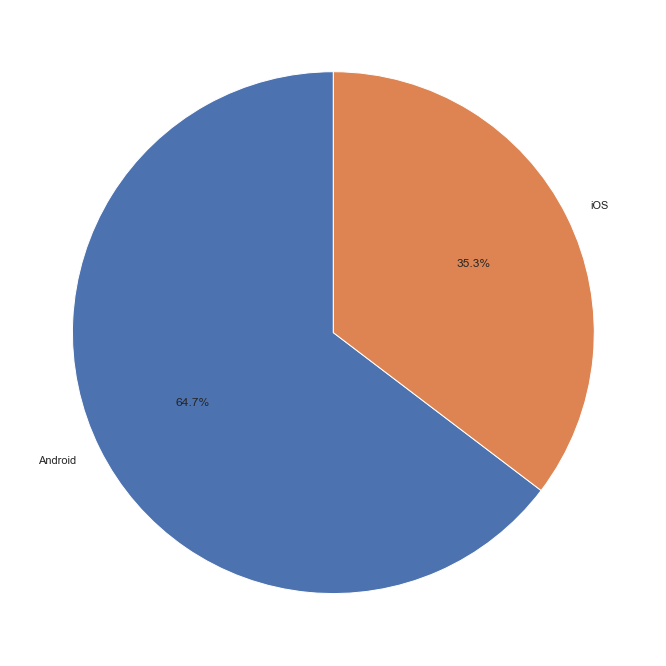

In [754]:
plt.figure(figsize=(12,12))
sns.set_theme()
plt.pie(df_device["Os"].value_counts(),labels=df_train["Os"].value_counts().index.to_list(),autopct='%1.1f%%', startangle=90);

In [755]:
df_device["devicebrand"].value_counts()

Apple      33238
samsung    31971
Redmi       7709
HUAWEI      6595
Other       5989
xiaomi      5300
OPPO        3247
Name: devicebrand, dtype: int64

In [756]:
df_device["devicebrand"].value_counts().describe()

count        7.000000
mean     13435.571429
std      13170.239581
min       3247.000000
25%       5644.500000
50%       6595.000000
75%      19840.000000
max      33238.000000
Name: devicebrand, dtype: float64

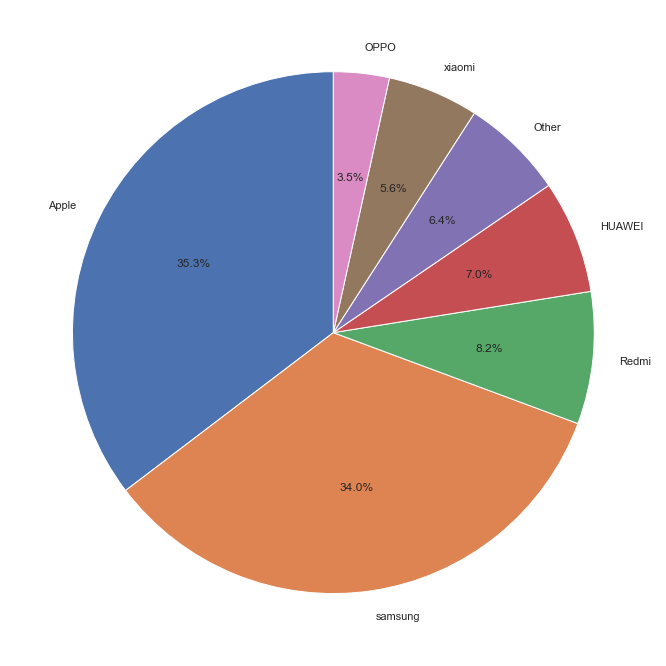

In [757]:
plt.figure(figsize=(12,12))
plt.pie(df_device["devicebrand"].value_counts(),labels=df_device["devicebrand"].value_counts().index.to_list(),autopct='%1.1f%%', startangle=90);

In [758]:
df_device["carrier"].value_counts()

TURKCELL        39043
VODAFONE TR     25583
TURK TELEKOM    22091
Other            7332
Name: carrier, dtype: int64

In [759]:
df_device["carrier"].value_counts().describe()

count        4.000000
mean     23512.250000
std      13029.615532
min       7332.000000
25%      18401.250000
50%      23837.000000
75%      28948.000000
max      39043.000000
Name: carrier, dtype: float64

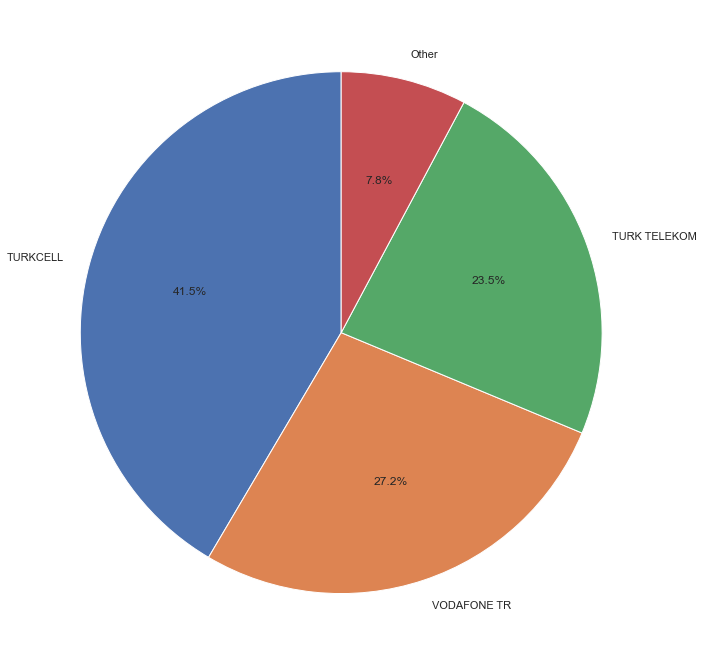

In [760]:
plt.figure(figsize=(12,12))
plt.pie(df_device["carrier"].value_counts(),labels=df_device["carrier"].value_counts().index.to_list(),autopct='%1.1f%%', startangle=90);

In [761]:
df_train["First_Menu"].value_counts()

menu6    59439
menu9    15906
menu2    13943
menu3     2996
menu7     1146
menu8      367
menu1      111
menu4      105
menu5       36
Name: First_Menu, dtype: int64

In [762]:
df_n_seconds = df_train[["n_seconds_1","n_seconds_2","n_seconds_3"]]

In [763]:
df_n_seconds["n_seconds_1_2_Sum"] = df_n_seconds[["n_seconds_1","n_seconds_2"]].sum(axis=1)
df_n_seconds["n_seconds_1_3_Sum"] = df_n_seconds[["n_seconds_1","n_seconds_3"]].sum(axis=1)
df_n_seconds["n_seconds_2_3_Sum"] = df_n_seconds[["n_seconds_2","n_seconds_3"]].sum(axis=1)
df_n_seconds["n_seconds_Sum"] = df_n_seconds.sum(axis=1)

C:\Users\Orhun\AppData\Local\Temp\ipykernel_13616\2868474431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_seconds["n_seconds_1_2_Sum"] = df_n_seconds[["n_seconds_1","n_seconds_2"]].sum(axis=1)
C:\Users\Orhun\AppData\Local\Temp\ipykernel_13616\2868474431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_seconds["n_seconds_1_3_Sum"] = df_n_seconds[["n_seconds_1","n_seconds_3"]].sum(axis=1)
C:\Users\Orhun\AppData\Local\Temp\ipykernel_13616\2868474431.py:3: SettingWithCopyWarning: 
A value is

In [764]:
df_n_seconds

,n_seconds_1,n_seconds_2,n_seconds_3,n_seconds_1_2_Sum,n_seconds_1_3_Sum,n_seconds_2_3_Sum,n_seconds_Sum
0,5245.571,981.182,205.948,6226.753,5451.519,1187.130,19298.103
1,5184.876,557.650,487.587,5742.526,5672.463,1045.237,18690.339
2,3835.618,3275.128,43.806,7110.746,3879.424,3318.934,21463.656
3,3532.544,154.509,64.724,3687.053,3597.268,219.233,11255.331
4,3344.192,787.896,715.115,4132.088,4059.307,1503.011,14541.609
...,...,...,...,...,...,...,...
94044,44.397,43.425,41.678,87.822,86.075,85.103,388.500
94045,44.331,43.977,40.620,88.308,84.951,84.597,386.784
94046,44.142,43.591,41.736,87.733,85.878,85.327,388.407
94047,43.963,43.350,40.862,87.313,84.825,84.212,384.525


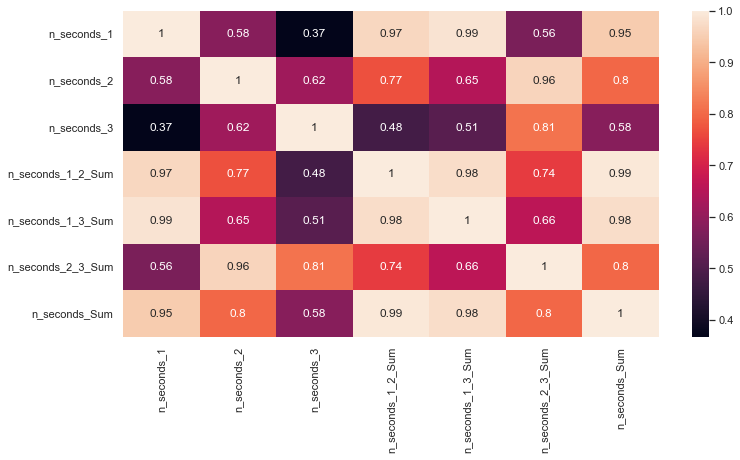

In [765]:
plt.figure(figsize=(12,6))
sns.heatmap(df_n_seconds.corr(),annot=True);

In [766]:
def label_encoding(df,column_name):
    label_encoder = LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name])

In [767]:
def one_hotcoding(df,column_name):
    one_hotcoder = pd.get_dummies(df[column_name])
    return one_hotcoder

In [768]:
df_train

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_45,feature_46,feature_47,feature_48,feature_49,binary,Os,First_Menu,Second_Menu,Third_Menu
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,1.658986,-1.559406,-2.161336,30,58,010110000,iOS,menu2,menu4,menu5
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,2.775513,-0.318980,-4.291473,21,45,000100110,Android,menu7,menu8,menu4
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,1.293131,-2.230909,-2.383524,19,61,010100010,Android,menu2,menu8,menu4
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,1.029710,-1.142185,-4.466191,2,41,110001000,Android,menu6,menu2,menu1
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.061626,-1.462175,-2.371206,23,85,010001010,Android,menu6,menu2,menu8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,2e54f32ced9fae6ef802ceaa2,12,44.397,43.425,41.678,Other,HUAWEI,-1.531534,2.596604,0.340233,...,0.761354,1.073711,-3.560019,29,68,010100010,Android,menu2,menu8,menu4
94045,6aa4ff0f6cc5ef4c2980b2862,12,44.331,43.977,40.620,TURKCELL,samsung,-1.268987,2.300487,0.231711,...,-0.893553,-2.061401,-1.908158,25,43,010010001,Android,menu9,menu2,menu5
94046,fa842185a0edd210845b78308,12,44.142,43.591,41.736,VODAFONE TR,Apple,-1.950039,2.805681,0.438200,...,-0.495204,-0.955097,-3.843092,4,25,010101000,iOS,menu6,menu2,menu4
94047,db8f55b8499f8d8c05148240e,12,43.963,43.350,40.862,TURK TELEKOM,Redmi,-2.389140,2.358281,0.683524,...,-0.100755,-1.056479,-1.452037,25,60,000101010,Android,menu6,menu8,menu4


In [769]:
label_encoding(df_train,"Os")
label_encoding(df_train,"First_Menu")
label_encoding(df_train,"Second_Menu")
label_encoding(df_train,"Third_Menu")


In [770]:
liste = ["carrier","devicebrand"]

for column_name in liste:
    df_train = pd.concat([df_train,one_hotcoding(df_train,column_name)],axis=1)
    df_train.drop(column_name,axis=1,inplace=True)

In [771]:
df_train.drop(columns=["id","binary"],inplace=True)

x = df_train.drop(columns=["First_Menu","Second_Menu","Third_Menu"])
y = df_train[["First_Menu","Second_Menu","Third_Menu"]]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [772]:
X_train

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,TURK TELEKOM,TURKCELL,VODAFONE TR,Apple,HUAWEI,OPPO,Other,Redmi,samsung,xiaomi
25787,11,467.913,310.153,277.905,-1.681805,2.142508,0.562797,-1.161826,3.215327,2.680432,...,0,0,1,1,0,0,0,0,0,0
72740,12,310.811,280.096,273.160,-1.790492,2.127541,1.071017,-1.208557,3.476660,2.698405,...,0,1,0,1,0,0,0,0,0,0
39526,11,201.131,145.928,47.916,-2.761982,0.012119,-0.135885,-1.355689,4.813400,2.741259,...,0,0,1,0,0,0,0,0,1,0
45165,11,132.749,118.371,114.088,-1.738869,1.273165,0.061282,0.667869,5.217914,2.270354,...,1,0,0,0,0,0,0,0,1,0
19376,11,758.930,288.933,186.044,-2.223320,1.023573,1.663910,0.056099,3.423272,2.460579,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10,307.836,251.927,118.365,1.238334,1.737300,-0.084119,-0.398327,2.958013,3.389990,...,0,0,0,0,0,0,0,0,1,0
54886,12,851.542,130.979,85.147,-1.532209,1.846237,1.084361,-1.060927,3.079069,1.763055,...,0,1,0,0,0,0,1,0,0,0
76820,12,258.191,104.041,89.864,-1.862614,1.710194,0.050358,-1.470732,3.468172,3.248292,...,1,0,0,1,0,0,0,0,0,0
860,10,857.067,287.388,279.076,-2.429906,1.634941,0.988270,-1.836210,2.790268,1.746827,...,1,0,0,0,0,0,0,0,1,0


In [773]:
X_test

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,TURK TELEKOM,TURKCELL,VODAFONE TR,Apple,HUAWEI,OPPO,Other,Redmi,samsung,xiaomi
71983,12,322.099,190.918,127.217,-2.223116,0.946927,1.107268,-2.571088,4.166251,2.517454,...,0,1,0,0,0,0,0,0,1,0
24607,11,507.390,65.318,48.413,-1.291186,1.739034,0.503340,-0.689582,3.157679,1.844524,...,1,0,0,0,0,0,0,0,1,0
55047,12,838.672,432.181,121.402,-1.927184,1.657606,0.691318,-0.072013,3.180029,3.272542,...,0,0,1,0,0,0,0,1,0,0
17346,11,1020.229,258.357,187.167,-1.793335,0.632174,-0.721243,-0.590299,3.254618,2.523640,...,0,0,0,0,0,0,1,0,0,0
68865,12,375.914,366.845,155.577,-1.202234,1.514095,0.476541,-0.138625,4.106358,1.224268,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80465,12,216.126,182.617,169.682,-1.230673,2.428997,0.825009,-0.968376,4.189285,2.830289,...,0,1,0,0,0,0,0,0,1,0
59726,12,596.786,137.695,65.673,-2.626715,1.322484,-0.889738,-0.178716,3.609083,1.972763,...,0,0,1,0,0,0,0,0,1,0
81005,12,210.314,79.150,53.961,-2.426843,2.036848,-0.181062,-1.126848,3.554234,3.212021,...,0,1,0,1,0,0,0,0,0,0
10243,10,185.012,67.814,44.382,-1.889391,2.445890,-0.387656,-0.373507,2.585038,2.858012,...,0,1,0,1,0,0,0,0,0,0


In [774]:
Y_train

,First_Menu,Second_Menu,Third_Menu
25787,5,3,0
72740,5,1,6
39526,8,1,2
45165,5,1,3
19376,5,1,3
...,...,...,...
6265,5,1,0
54886,5,1,2
76820,5,1,6
860,8,6,2


In [775]:
Y_test

,First_Menu,Second_Menu,Third_Menu
71983,5,7,0
24607,5,1,0
55047,5,1,3
17346,5,3,7
68865,8,4,0
...,...,...,...
80465,5,2,1
59726,1,3,3
81005,1,0,3
10243,1,3,0


In [776]:
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

In [777]:
values = Y_test.to_numpy()

In [778]:
values

array([[5, 7, 0],
       [5, 1, 0],
       [5, 1, 3],
       ...,
       [1, 0, 3],
       [1, 3, 0],
       [5, 1, 3]])

In [790]:
prediction

array([[5, 1, 6],
       [5, 1, 0],
       [5, 1, 2],
       ...,
       [5, 1, 3],
       [5, 1, 2],
       [5, 1, 2]])

In [781]:
def numpy_to_binary(numpy_array):
    binary_array = []

    for array in numpy_array:
        binary = [0,0,0,0,0,0,0,0,0]
        for j in range(len(array)):
            binary[array[j]] = 1
        binary_array.append(binary)
    
    return np.array(binary_array)

In [782]:
def jaccard_similarity_score(values,prediction):
    jaccard_score_list = []
    for i in range(len(values)):
        intersection = np.sum(np.logical_and(values[i],prediction[i]))
        union = np.sum(np.logical_or(values[i],prediction[i]))

        jaccard_score = intersection / union

        jaccard_score_list.append(jaccard_score)

    return sum(jaccard_score_list)/len(jaccard_score_list)

In [787]:
values_bin = numpy_to_binary(values)
prediction_bin = numpy_to_binary(prediction)

jaccard_similarity_score(values_bin, prediction_bin)


0.528999645578593

In [788]:
def jaccard_similarity_score(y_true, y_pred):
    jaccard_scores = []
    for i in range(len(y_true)):
        intersection = np.sum(np.logical_and(y_true[i], y_pred[i]))
        union = np.sum(np.logical_or(y_true[i], y_pred[i]))
        jaccard_score = intersection / union
        jaccard_scores.append(jaccard_score)
    return np.mean(jaccard_scores)


def process_predictions(y_pred, y_test):
    y_test = np.array(y_test)

    def to_binary_representation(data):
        joined_array = np.array([', '.join(map(str, row)) for row in data])
        all_menus = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
        binary_rep = [[1 if menu in entry else 0 for menu in all_menus] for entry in joined_array]
        return np.array(binary_rep)

    y_pred_binary = to_binary_representation(y_pred)
    y_test_binary = to_binary_representation(y_test)

    return y_test_binary, y_pred_binary




y_true, y_pred = process_predictions(values,prediction)

score = jaccard_similarity_score(y_true, y_pred)
print(f"Jaccard Score for : {score}")

Jaccard Score for : 0.5555688463583202
